<a href="https://colab.research.google.com/github/Adelakun1999/my-project/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import numpy as np


In [2]:
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

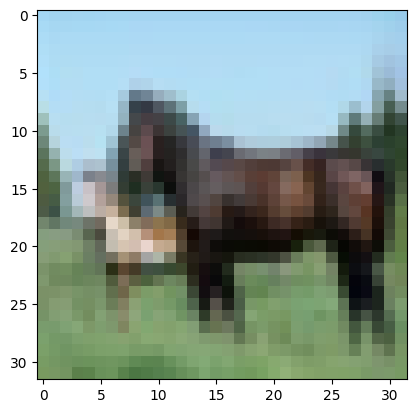

In [3]:
plt.imshow(X_train[12])

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
y_cat_train = to_categorical(y_train)

In [15]:
y_cat_test = to_categorical(y_test)

In [17]:
X_train = X_train/255

In [18]:
X_test = X_test/255

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',
                 input_shape=(32,32,3)))
model.add(MaxPool2D())

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',
                 input_shape=(32,32,3)))
model.add(MaxPool2D())

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',
                 input_shape=(32,32,3)))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [27]:
model.fit(x=X_train,y=y_cat_train,epochs=20,validation_data=(X_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/20
1563/1563 [==============================] - 68s 42ms/step - loss: 1.6681 - accuracy: 0.3809 - val_loss: 1.4609 - val_accuracy: 0.4674
Epoch 2/20
1563/1563 [==============================] - 63s 41ms/step - loss: 1.3310 - accuracy: 0.5165 - val_loss: 1.2569 - val_accuracy: 0.5531
Epoch 3/20
1563/1563 [==============================] - 65s 41ms/step - loss: 1.2223 - accuracy: 0.5601 - val_loss: 1.2021 - val_accuracy: 0.5818
Epoch 4/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1469 - accuracy: 0.5881 - val_loss: 1.1836 - val_accuracy: 0.5746
Epoch 5/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0970 - accuracy: 0.6124 - val_loss: 1.1012 - val_accuracy: 0.6086
Epoch 6/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0448 - accuracy: 0.6288 - val_loss: 1.0919 - val_accuracy: 0.6188
Epoch 7/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0113 - accuracy: 0.6421 - val_loss: 1.0565 -

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 32)          16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [30]:
losses = pd.DataFrame(model.history.history)

In [32]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.668139,0.38086,1.460901,0.4674
1,1.331017,0.51652,1.256860,0.5531
2,1.222300,0.56008,1.202125,0.5818
3,1.146914,0.58812,1.183634,0.5746
4,1.096959,0.61244,1.101240,0.6086


In [34]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test, verbose=0))

['loss', 'accuracy']
[1.0416300296783447, 0.6553000211715698]


<Axes: >

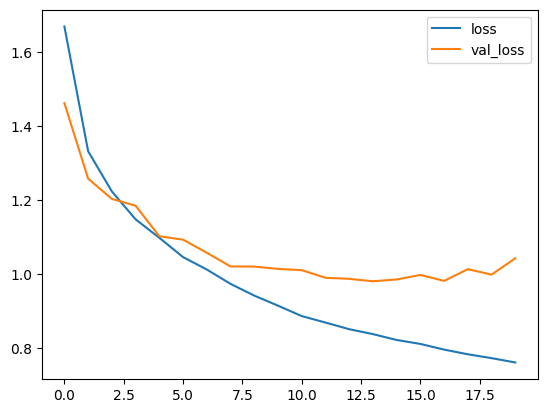

In [42]:
losses[['loss','val_loss']].plot()

<Axes: >

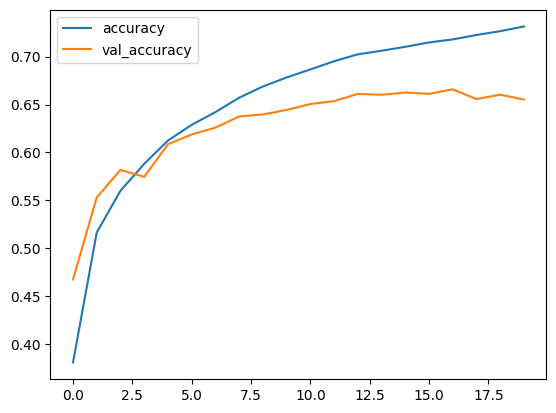

In [46]:
losses[['accuracy','val_accuracy']].plot()

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
y_pred = model.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [68]:
y_pred =[np.argmax(i) for i in y_pred]

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67      1000
           1       0.81      0.77      0.79      1000
           2       0.52      0.57      0.54      1000
           3       0.52      0.44      0.48      1000
           4       0.63      0.60      0.62      1000
           5       0.68      0.45      0.54      1000
           6       0.80      0.68      0.74      1000
           7       0.69      0.72      0.71      1000
           8       0.59      0.88      0.70      1000
           9       0.77      0.71      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



<Axes: >

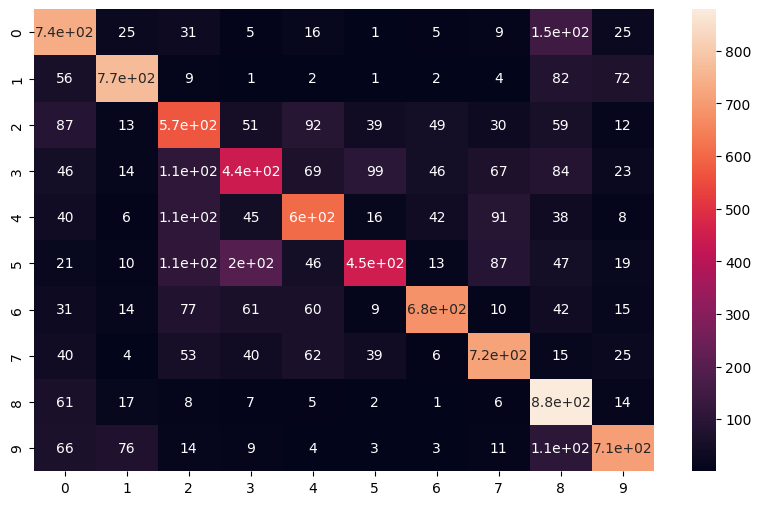

In [72]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

## **Predicting a given image**

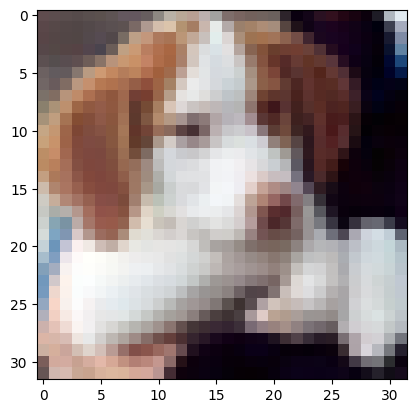

In [81]:
plt.imshow(X_test[16])
#The image of a dog

In [76]:
X_test[16].shape

(32, 32, 3)

In [80]:
np.argmax(model.predict(X_test[16].reshape(1,32,32,3)))

1/1 [==============================] - 0s 46ms/step


5

## 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html